# Heart Failure Prediction Model Using Machine Learning

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('heart.csv')   

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isnull().sum()        #no null values present in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.shape

(918, 12)

# Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt

In [8]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [10]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [11]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [13]:
df_heartdisease=df[df['HeartDisease']==1]   
len(df_heartdisease)      #Number of people in the dataset having heart disease

508

In [14]:
df_heartdisease.describe()      #details of the patients having heart disease

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [15]:
df.groupby('HeartDisease').mean()['Age']  #Mean Age of the people

HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64

In [16]:
df.groupby('HeartDisease').mean()['RestingBP']

HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64

In [17]:
df.groupby('HeartDisease').mean()['MaxHR']

HeartDisease
0    148.151220
1    127.655512
Name: MaxHR, dtype: float64

<AxesSubplot:xlabel='ChestPainType'>

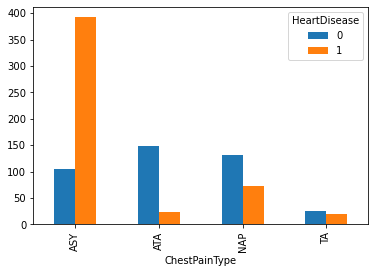

In [18]:
pd.crosstab(df.ChestPainType,df.HeartDisease).plot.bar()

<AxesSubplot:xlabel='RestingECG'>

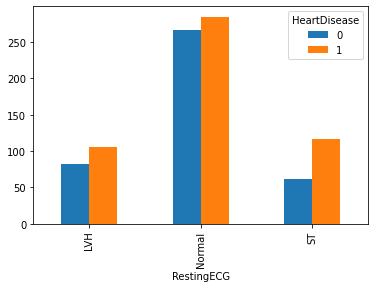

In [19]:
pd.crosstab(df.RestingECG,df.HeartDisease).plot.bar()

<AxesSubplot:xlabel='ExerciseAngina'>

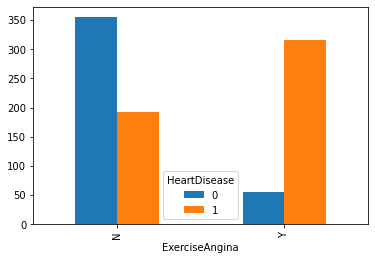

In [20]:
pd.crosstab(df.ExerciseAngina,df.HeartDisease).plot.bar()  

<AxesSubplot:xlabel='ST_Slope'>

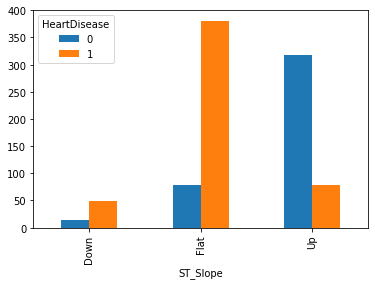

In [21]:
pd.crosstab(df.ST_Slope,df.HeartDisease).plot.bar()   #People with Flat ST_Slope have more chances of heart disease

# OUTLIER REMOVAL

<AxesSubplot:>

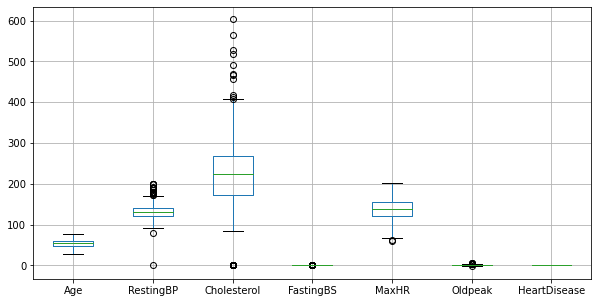

In [22]:
df.boxplot(figsize=(10,5))

In [23]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [24]:
df.RestingBP.mean()

132.39651416122004

In [25]:
df.RestingBP.std()

18.514154119907808

In [26]:
upper_limit=df.RestingBP.mean()+3*df.RestingBP.std()
lower_limit=df.RestingBP.mean()-3*df.RestingBP.std()
print(upper_limit,lower_limit)

187.93897652094347 76.85405180149661


In [27]:
d=df[(df['RestingBP'] <= upper_limit) & (df['RestingBP'] >= lower_limit)]
d.shape

(910, 12)

In [28]:
d.Cholesterol.mean()

199.121978021978

In [29]:
d.Cholesterol.std()

109.14478762153533

In [30]:
up_limit=d.Cholesterol.mean() + 2 * d.Cholesterol.std()
low_limit=d.Cholesterol.mean() - 2 - d.Cholesterol.std()

In [31]:
print(up_limit,low_limit)

417.41155326504867 87.97719040044268


In [32]:
df_new=d[(d.Cholesterol<up_limit) & (d.Cholesterol>=low_limit)]
df_new.shape

(732, 12)

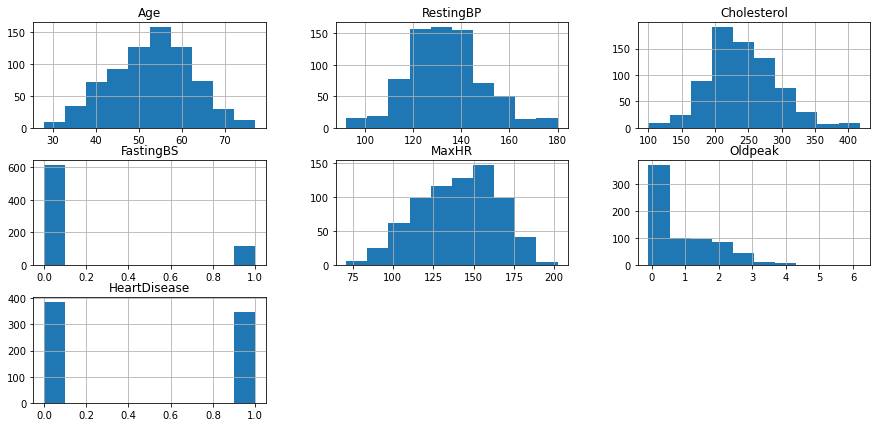

In [33]:
df_new.hist(figsize=(15,7))
plt.show()

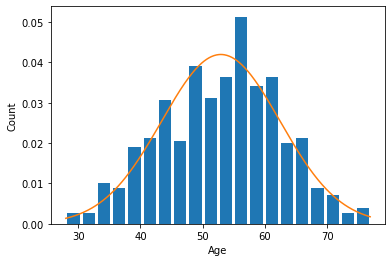

In [34]:
from scipy.stats import norm
plt.hist(df_new.Age,bins=20,rwidth=0.8,density=True)
plt.xlabel('Age')
plt.ylabel('Count')

r=np.arange(df_new.Age.min(),df_new.Age.max(),0.1)
plt.plot(r,norm.pdf(r,df_new.Age.mean(),df_new.Age.std()))

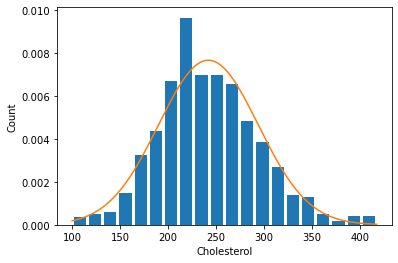

In [35]:
from scipy.stats import norm
plt.hist(df_new.Cholesterol,bins=20,rwidth=0.8,density=True)
plt.xlabel('Cholesterol')
plt.ylabel('Count')

r=np.arange(df_new.Cholesterol.min(),df_new.Cholesterol.max(),0.1)
plt.plot(r,norm.pdf(r,df_new.Cholesterol.mean(),df_new.Cholesterol.std()))

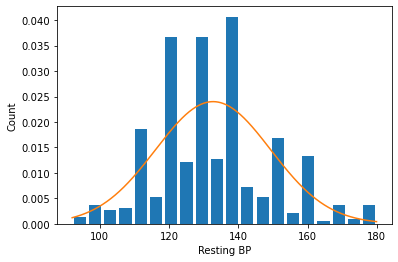

In [36]:
from scipy.stats import norm
plt.hist(df_new.RestingBP,bins=20,rwidth=0.8,density=True)
plt.xlabel('Resting BP')
plt.ylabel('Count')

r=np.arange(df_new.RestingBP.min(),df_new.RestingBP.max(),0.1)
plt.plot(r,norm.pdf(r,df_new.RestingBP.mean(),df_new.RestingBP.std()))

For cholesterol level we are bringing the range between 100 and 350

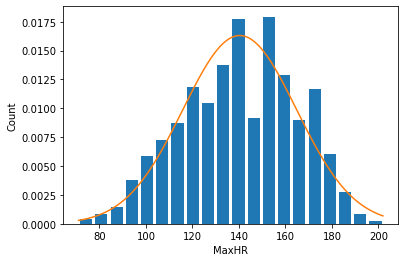

In [37]:
from scipy.stats import norm
plt.hist(df_new.MaxHR,bins=20,rwidth=0.8,density=True)
plt.xlabel('MaxHR')
plt.ylabel('Count')

r=np.arange(df_new.MaxHR.min(),df_new.MaxHR.max(),0.1)
plt.plot(r,norm.pdf(r,df_new.MaxHR.mean(),df_new.MaxHR.std()))

# MODEL BUILDING

Converting the categorical variables to numeric values

In [38]:
dummy0=pd.get_dummies(df_new.Sex)
dummy0.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [39]:
dummy1=pd.get_dummies(df_new.ChestPainType)
dummy1.head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [40]:
dummy2=pd.get_dummies(df_new.RestingECG)
dummy2.head()

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [41]:
dummy3=pd.get_dummies(df_new.ExerciseAngina)
dummy3.head()

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [42]:
dummy4=pd.get_dummies(df_new.ST_Slope)
dummy4.head()

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [43]:
merged_df=pd.concat([df_new,dummy0,dummy1,dummy2,dummy3,dummy4],axis='columns')
merged_df1 = merged_df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis='columns')
merged_df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [46]:
final_df = merged_df1.drop(['M','TA','ST','Y','Up'],axis='columns')
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,ASY,ATA,NAP,LVH,Normal,N,Down,Flat
0,40,140,289,0,172,0.0,0,0,0,1,0,0,1,1,0,0
1,49,160,180,0,156,1.0,1,1,0,0,1,0,1,1,0,1
2,37,130,283,0,98,0.0,0,0,0,1,0,0,0,1,0,0
3,48,138,214,0,108,1.5,1,1,1,0,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,0,1,0,1,1,0,0


In [47]:
final_df.shape

(732, 16)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [50]:
X=final_df.drop(['HeartDisease'],axis='columns')

In [51]:
y=final_df['HeartDisease']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.3580889 ,  0.43949491,  0.90762922, ...,  0.79162281,
        -0.24042352, -0.94936753],
       [-0.41120672,  1.64327515, -1.18967798, ...,  0.79162281,
        -0.24042352,  1.05333285],
       [-1.67371629, -0.16239522,  0.79218112, ...,  0.79162281,
        -0.24042352, -0.94936753],
       ...,
       [ 0.43046632, -0.16239522, -2.13250415, ..., -1.26322788,
        -0.24042352,  1.05333285],
       [ 0.43046632, -0.16239522, -0.11216235, ...,  0.79162281,
        -0.24042352,  1.05333285],
       [-1.56850716,  0.31911688, -1.28588473, ...,  0.79162281,
        -0.24042352, -0.94936753]])

In [53]:
logistic_model=cross_val_score(LogisticRegression(),X_scaled,y)
logistic_model.mean()

0.8577951728636661

In [54]:
svm=cross_val_score(SVC(),X,y)
svm.mean()

0.6816792470412822

Logistic Regression performs better than SVM

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [56]:
X_train

array([[ 0.0096298 ,  2.8470554 ,  0.83066382, ..., -1.26322788,
        -0.24042352,  1.05333285],
       [-0.20078846,  1.04138503, -0.80485097, ...,  0.79162281,
        -0.24042352, -0.94936753],
       [-0.30599759,  2.24516528, -0.63167881, ...,  0.79162281,
        -0.24042352, -0.94936753],
       ...,
       [-0.72683411,  0.43949491,  0.63825031, ..., -1.26322788,
        -0.24042352, -0.94936753],
       [ 0.43046632,  0.43949491, -0.95878177, ...,  0.79162281,
        -0.24042352,  1.05333285],
       [-0.41120672, -0.76428534,  1.06156002, ...,  0.79162281,
        -0.24042352,  1.05333285]])

In [57]:
y_train.head()

189    1
258    0
191    0
846    1
21     0
Name: HeartDisease, dtype: int64

In [58]:
X_test

array([[-1.67371629, -0.16239522, -1.32436743, ...,  0.79162281,
        -0.24042352, -0.94936753],
       [ 1.37734849,  1.64327515,  0.08025115, ..., -1.26322788,
        -0.24042352,  1.05333285],
       [-1.04246151, -0.04201719,  1.90817944, ..., -1.26322788,
        -0.24042352,  1.05333285],
       ...,
       [-0.09557933, -0.46334028,  0.58052626, ...,  0.79162281,
        -0.24042352, -0.94936753],
       [-0.93725238, -0.16239522, -0.43926531, ...,  0.79162281,
        -0.24042352, -0.94936753],
       [ 0.85130284,  0.92100701, -0.74712692, ...,  0.79162281,
        -0.24042352, -0.94936753]])

In [59]:
y_test.head(10)

229    0
663    1
842    1
908    1
895    1
234    0
671    1
880    0
40     0
108    0
Name: HeartDisease, dtype: int64

In [69]:
mod_log=LogisticRegression()
mod_log.fit(X_train,y_train)

LogisticRegression()

In [70]:
mod_log.predict([[40,140,289,0,172,0.0,0,0,1,0,0,1,1,0,0]])

array([1], dtype=int64)

In [71]:
mod_log.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [72]:
mod_log.score(X_test,y_test)

0.8571428571428571